# Basic functions

In [2]:


import numpy as np

import matplotlib.pyplot as plt
import os
from plot_utils import *
import pickle


import matplotlib.cm as cmx
import matplotlib



# Import results

In [2]:
all_data_folds_perfs = pickle.load(open(os.path.join(os.path.dirname(os.getcwd()),'results','HC_perf.pickle'),'rb'))
all_data_folds_reg = pickle.load(open(os.path.join(os.path.dirname(os.getcwd()),'results','HC_reg.pickle'),'rb'))

all_data_folds_perfs_cone = pickle.load(open(os.path.join(os.path.dirname(os.getcwd()),'results','HC_perf_cone.pickle'),'rb'))
all_data_folds_reg_cone = pickle.load(open(os.path.join(os.path.dirname(os.getcwd()),'results','HC_reg_cone.pickle'),'rb'))

atm = np.load(os.path.join(os.path.dirname(os.getcwd()),'results','ATM_perfs.npy'), allow_pickle=True)
atm_cone = np.load(os.path.join(os.path.dirname(os.getcwd()),'results','ATM_perfs_cone.npy'), allow_pickle=True)
# perfs/regs, model, nbr test, 1, rotations, reg/perf of perfs/regs

all_error_atm_cone_reg = np.sum(atm_cone[0,:,:,0,:,0],axis=-1)


In [3]:

# Right-angle Hippocampus
perfs = []
regs = []
perfs_nomean = []
regs_nomean = []
start_id = 1
stop_id = 3

for i in range(len(all_data_folds_reg)):
    tmp_p = []
    tmp_r = []
    for j in range(len(all_data_folds_perfs[i])):
        tmp_p.append(all_data_folds_perfs[i][j][0][:,start_id:stop_id, :, :2])
        tmp_r.append(all_data_folds_reg[i][j][0][:,start_id:stop_id, :, :2])
    tmp_p = np.array(tmp_p)
    tmp_r = np.array(tmp_r)
    shapes = [-1]+list(tmp_p.shape[2:])

    perfs.append(np.mean(tmp_p,axis=0))
    perfs_nomean.append(tmp_p)
    regs.append(np.mean(tmp_r, axis=0)[:,:,1:])
    regs_nomean.append(tmp_r[...,1:,:])
    
# Cone hippocampus
perfs_cone = []
regs_cone = []

start_id = 1
stop_id = 3

for i in range(len(all_data_folds_reg_cone)):
    tmp_p = []
    tmp_r = []
    for j in range(len(all_data_folds_perfs_cone[i])):
        tmp_p.append(all_data_folds_perfs_cone[i][j][0][:,start_id:stop_id, :, :2])
        tmp_r.append(all_data_folds_reg_cone[i][j][0][:,start_id:stop_id, 1:, :2])
            
    perfs_cone.append(np.mean(tmp_p,axis=0))
    regs_cone.append(np.mean(tmp_r, axis=0))
    

# ATM right-angle
atm_regs = [atm[1][i][:,:,1:] for i in range(atm[1].shape[0])]
atm_perfs = [atm[0][i] for i in range(atm[0].shape[0])]

# ATM Cone
atm_regs_cone = [atm_cone[1][i][:,:,1:] for i in range(atm_cone[1].shape[0])]
atm_perfs_cone = [atm_cone[0][i] for i in range(atm_cone[0].shape[0])]
    

hc_regs_cone_array = []
hc_perfs_cone_array = []
for j in range(len(all_data_folds_reg_cone)):
    tmp = [all_data_folds_reg_cone[j][k][0] for k in range(len(all_data_folds_reg_cone[j]))]
    hc_regs_cone_array.append(tmp)
    tmp_perf = [all_data_folds_perfs_cone[j][k][0] for k in range(len(all_data_folds_reg_cone[j]))]
    hc_perfs_cone_array.append(tmp_perf)
hc_regs_cone_array = np.array(hc_regs_cone_array)
hc_perfs_cone_array = np.array(hc_perfs_cone_array)

all_error_hc_cone_reg = np.sum(hc_regs_cone_array[:,:,:,1:,:,0],axis=(3,4))


In [4]:
# HC
# #4,4,2, 52,3,13,8 
# models, folds, data/name, nbr test,classes, rotations, metric (0 RMSE, 1 DICE)

# ATM
# 2,3,22,1,13,2
# perfs/regs, models, nbr test, 1, rotations, reg/perf of perfs/regs

## Show results plots

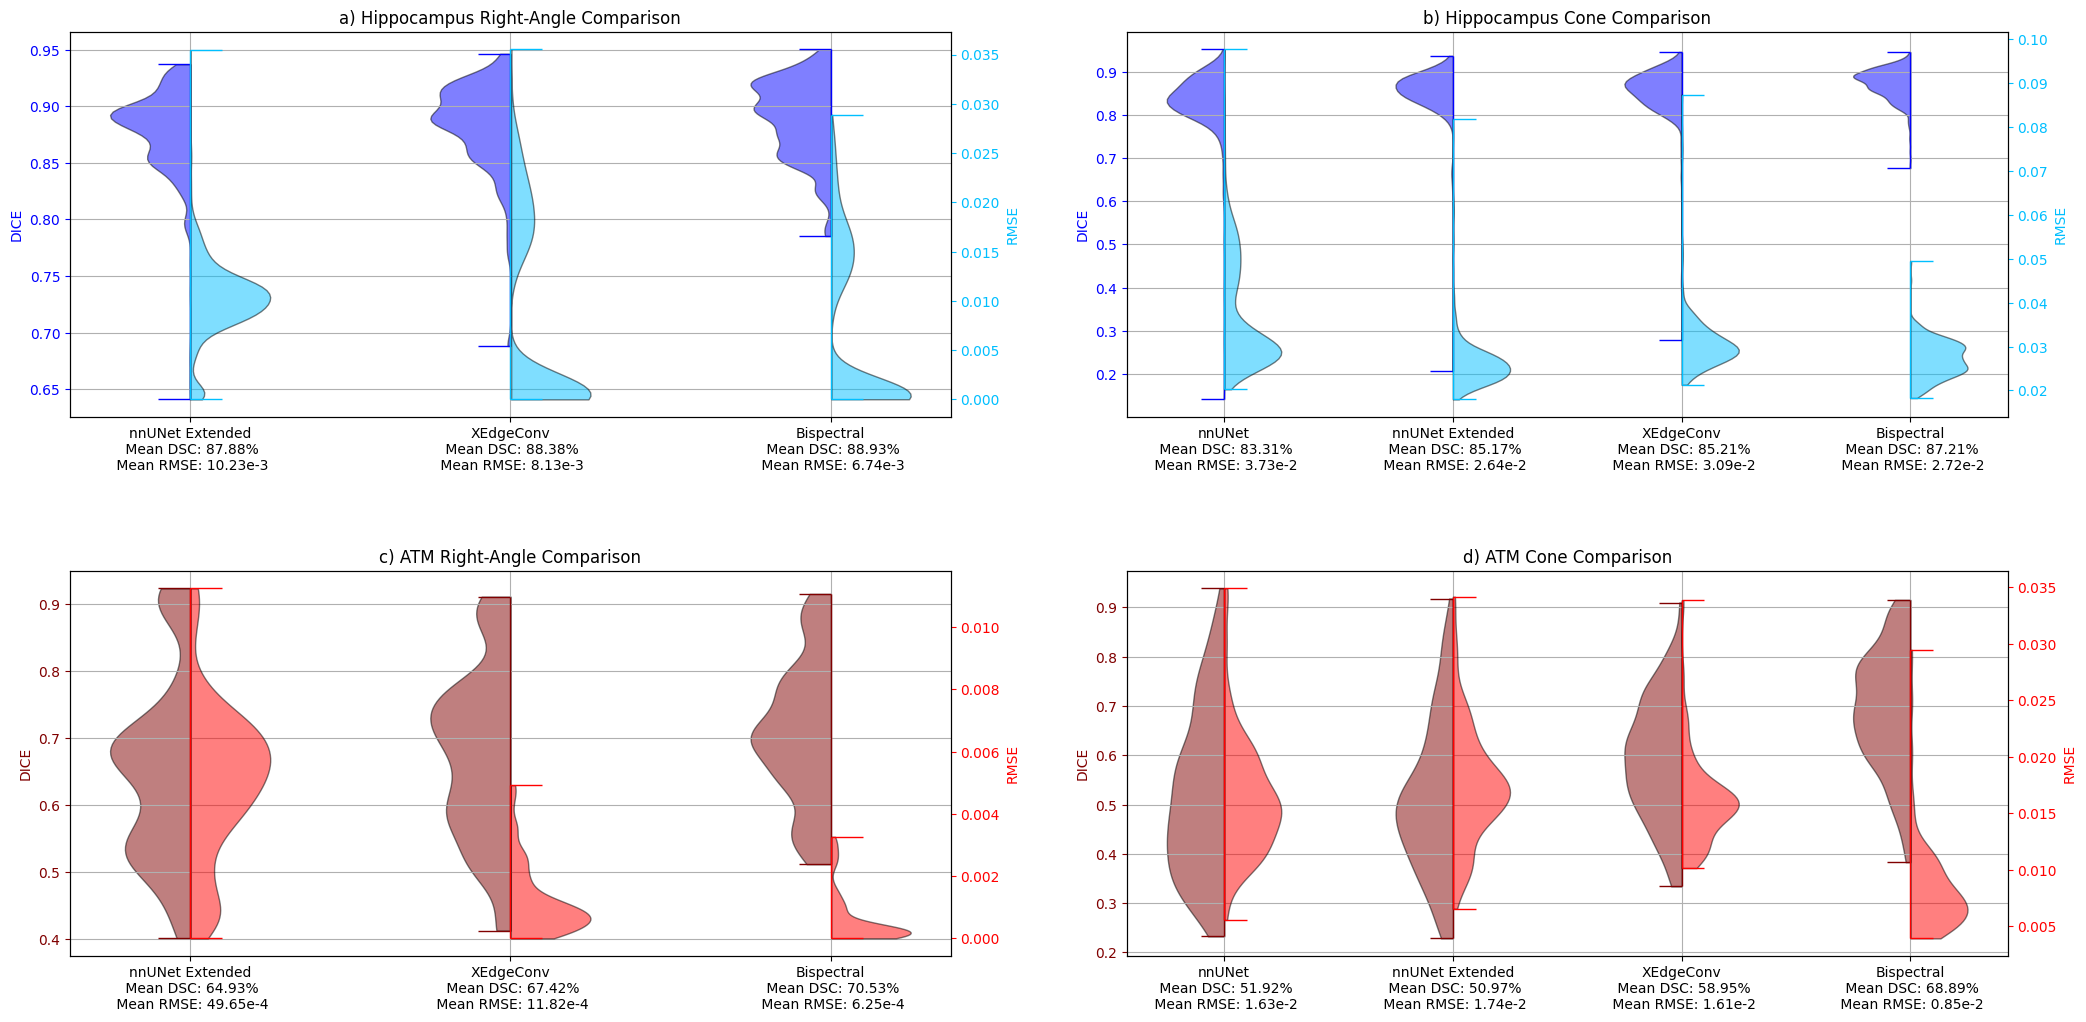

In [5]:


fig, ax = plt.subplots(2, 2, figsize=(25,12))
plt.subplots_adjust(hspace=0.4)

y = [i for i in range(5)]
y_name = ['','Performance','', 'Rotation Stability','']


model_names = ['nnUNet Extended', 'XEdgeConv', 'Bispectral']
x = [i+1 for i in range(len(model_names))]

ax[0,0].set_title(f"a) Hippocampus Right-Angle Comparison")
ax[0,1].set_title(f"b) Hippocampus Cone Comparison")

color_list = ['blue']*3
color_list_rmse = ['deepskyblue']*3
show_means = True

create_violin_subplot_2(ax[0,0], perfs, regs, model_names.copy(), x, y, y_name, rmse_prec=3, color_list = color_list, color_list_rmse = color_list_rmse, show_means=show_means)
model_names = ['nnUNet','nnUNet Extended', 'XEdgeConv', 'Bispectral']
x = [i+1 for i in range(len(model_names))]

color_list = ['blue']*4
color_list_rmse = ['deepskyblue']*4
create_violin_subplot_2(ax[0,1], perfs_cone, regs_cone, model_names.copy(), x, y, y_name, rmse_prec=2, color_list = color_list, color_list_rmse = color_list_rmse, show_means=show_means)


model_names = ['nnUNet Extended', 'XEdgeConv', 'Bispectral']
x = [i+1 for i in range(len(model_names))]

ax[1,0].set_title(f"c) ATM Right-Angle Comparison")
ax[1,1].set_title(f"d) ATM Cone Comparison")

color_list = ['olivedrab']*3
color_list_rmse = ['green']*3

color_list = ['darkgreen']*4
color_list_rmse = ['limegreen']*4

color_list = ['maroon']*4
color_list_rmse = ['red']*4

create_violin_subplot_2(ax[1,0], atm_perfs, atm_regs, model_names.copy(), x, y, y_name, rmse_prec=4, color_list = color_list, color_list_rmse = color_list_rmse, show_means=show_means)
model_names = ['nnUNet Extended', 'XEdgeConv', 'Bispectral']
x = [i+1 for i in range(len(model_names))]

color_list = ['maroon']*4
color_list_rmse = ['red']*4
model_names = ['nnUNet','nnUNet Extended', 'XEdgeConv', 'Bispectral']
x = [i+1 for i in range(len(model_names))]
create_violin_subplot_2(ax[1,1], atm_perfs_cone, atm_regs_cone, model_names.copy(), x, y, y_name, rmse_prec=2, color_list = color_list, color_list_rmse = color_list_rmse, show_means=show_means)

#plt.savefig('final_compare.eps', format='eps',bbox_inches='tight')


# Show differences in predictions

In [4]:
img_diff = pickle.load(open(os.path.join(os.path.dirname(os.getcwd()),'results','exemple_predictions.pickle'), 'rb'))


In [7]:

all_gt_RA = img_diff['RA']['GT']
all_nn_base_RA = img_diff['RA']['base nnUNet']
all_nn_RA = img_diff['RA']['Extended nnUNet']
all_xe_RA = img_diff['RA']['XEdegeConv']
all_bi_RA = img_diff['RA']['Bispectral']


all_gt = img_diff['cone']['GT']
all_nn_base = img_diff['cone']['base nnUNet']
all_nn = img_diff['cone']['Extended nnUNet']
all_xe = img_diff['cone']['XEdegeConv']
all_bi = img_diff['cone']['Bispectral']
    


gts_RA, nn_bases_RA, nns_RA, bis_RA, xes_RA = [],[],[],[],[]
nn_bases_m_RA, nns_m_RA, bis_m_RA, xes_m_RA = [],[],[],[]
for gt_RA, nn_base_RA, nn_RA, xi_RA, bi_RA in zip(all_gt_RA, all_nn_base_RA, all_nn_RA, all_xe_RA, all_bi_RA):
    gts_RA.append(gt_RA)
    nn_bases_RA.append(np.argmax(nn_base_RA, axis=0))
    nns_RA.append(np.argmax(nn_RA, axis=0))
    xes_RA.append(np.argmax(xi_RA, axis=0))
    bis_RA.append(np.argmax(bi_RA, axis=0))
    
    nn_bases_m_RA.append(np.max(nn_base_RA, axis=0))
    nns_m_RA.append(np.max(nn_RA, axis=0))
    xes_m_RA.append(np.max(xi_RA, axis=0))
    bis_m_RA.append(np.max(bi_RA, axis=0))

gts, nn_bases, nns, bis, xes = [],[],[],[],[]
nn_base_m, nns_m, bis_m,xes_m = [],[],[],[]
for gt, nn_base, nn, xi, bi in zip(all_gt, all_nn_base, all_nn, all_xe, all_bi):
    gts.append(gt)
    nn_bases.append(np.argmax(nn_base, axis=0))
    nns.append(np.argmax(nn, axis=0))
    xes.append(np.argmax(xi, axis=0))
    bis.append(np.argmax(bi, axis=0))
    
    nn_base_m.append(np.max(nn_base, axis=0))
    nns_m.append(np.max(nn, axis=0))
    xes_m.append(np.max(xi, axis=0))
    bis_m.append(np.max(bi, axis=0))


In [8]:


cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)



## Right-angle

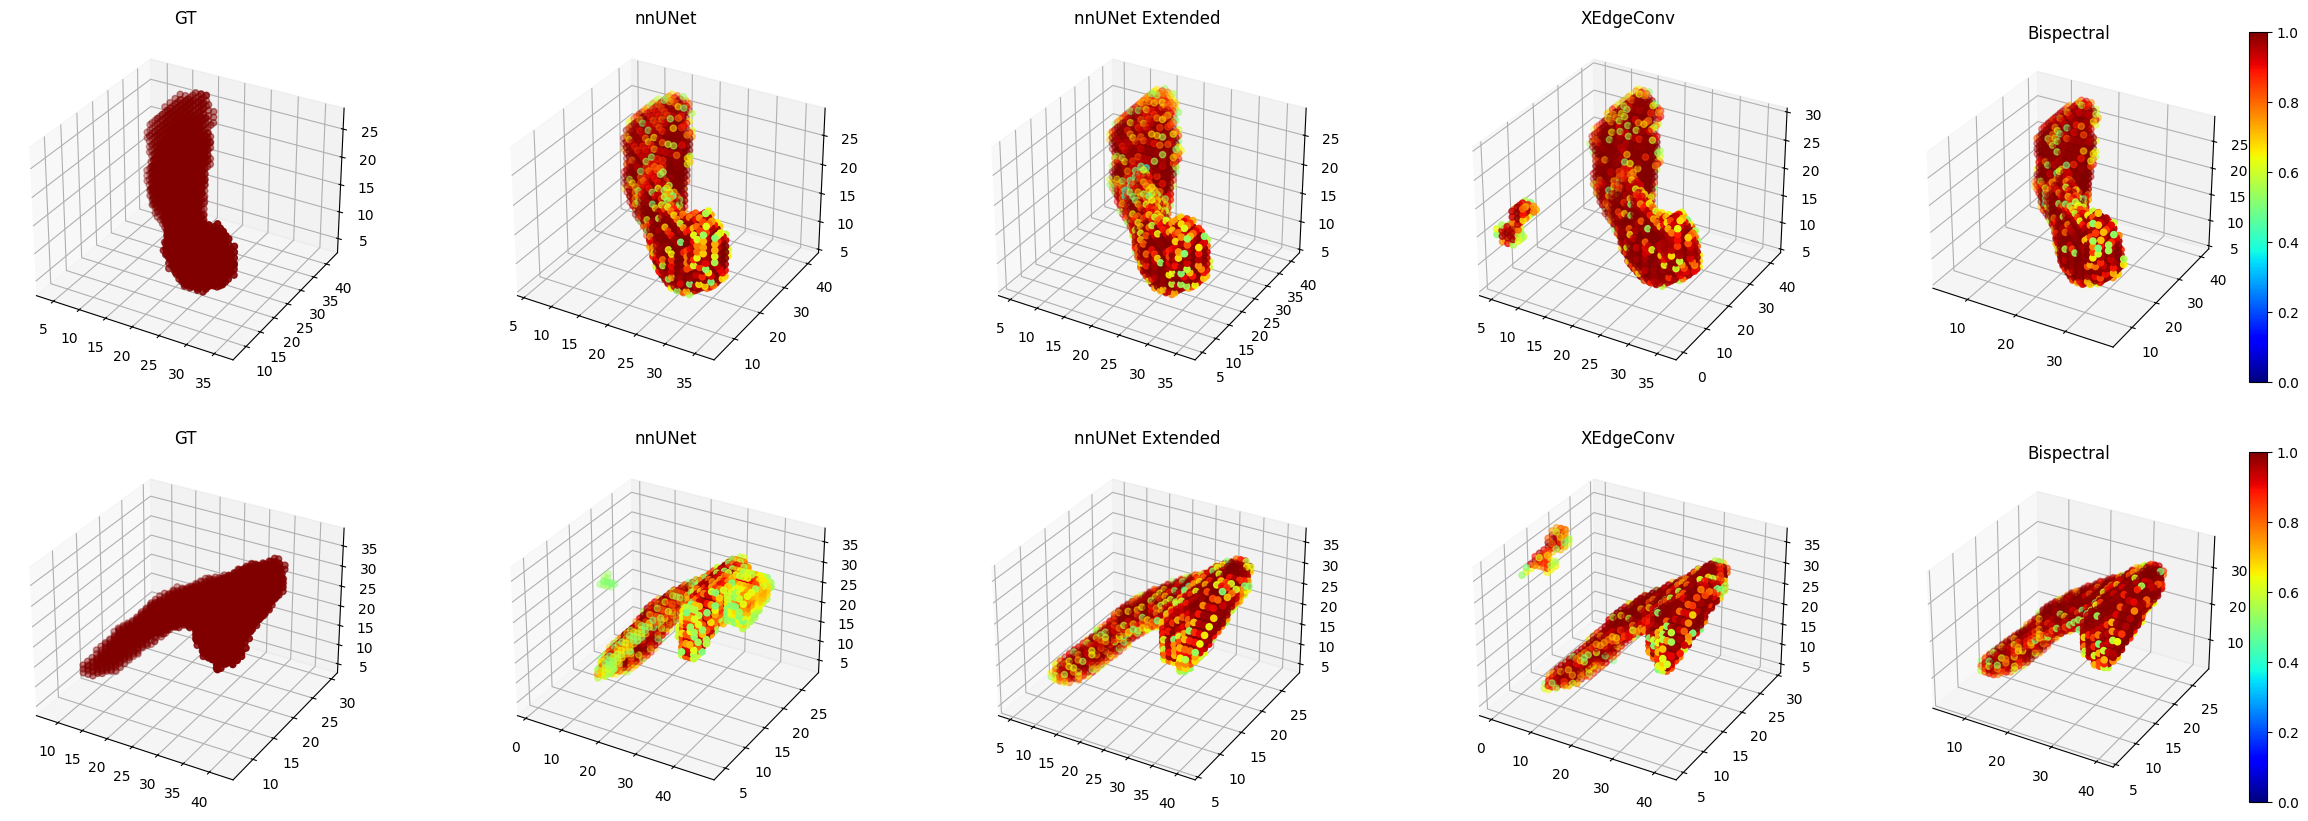

In [9]:

nbr_rot = len(gts_RA)
model_used = ['GT', 'nnUNet','nnUNet Extended', 'XEdgeConv', 'Bispectral']

nbr_model = len(model_used)
fig = plt.figure(figsize=(6*nbr_model,5*nbr_rot))
cntr = 0
for current_rot in range(nbr_rot):
    
    cntr += 1
    ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
    ax.set_title('GT')
    gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z = np.nonzero(gts_RA[current_rot])
    cs = gts_RA[current_rot][gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z]
    c=scalarMap.to_rgba(cs)
    ax.scatter(gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z, c=c)
    
    if 'nnUNet' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('nnUNet')
        nn_scs_val = nn_bases_m_RA[current_rot] * (nn_bases_RA[current_rot]>0).astype(int)
        gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z = np.nonzero(nn_scs_val)
        cs = nn_scs_val[gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z, c=c)
        #scalarMap.set_array(cs)

    if 'nnUNet Extended' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('nnUNet Extended')
        nns_val = nns_m_RA[current_rot] * (nns_RA[current_rot]>0).astype(int)
        gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z = np.nonzero(nns_val)
        cs = nns_val[gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z, c=c)
        #scalarMap.set_array(cs)
        
    if 'XEdgeConv' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('XEdgeConv')
        xes_val = xes_m_RA[current_rot] * (xes_RA[current_rot]>0).astype(int)
        gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z = np.nonzero(xes_val)
        cs = xes_val[gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z, c=c)
        
    if 'Bispectral' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('Bispectral')
        bis_val = bis_m_RA[current_rot] * (bis_RA[current_rot]>0).astype(int)
        gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z = np.nonzero(bis_val)
        cs = bis_val[gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_sc_x, gt_nn_sc_y, gt_nn_sc_z, c=c)
    

        
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap, ax= ax)
    


## Cone

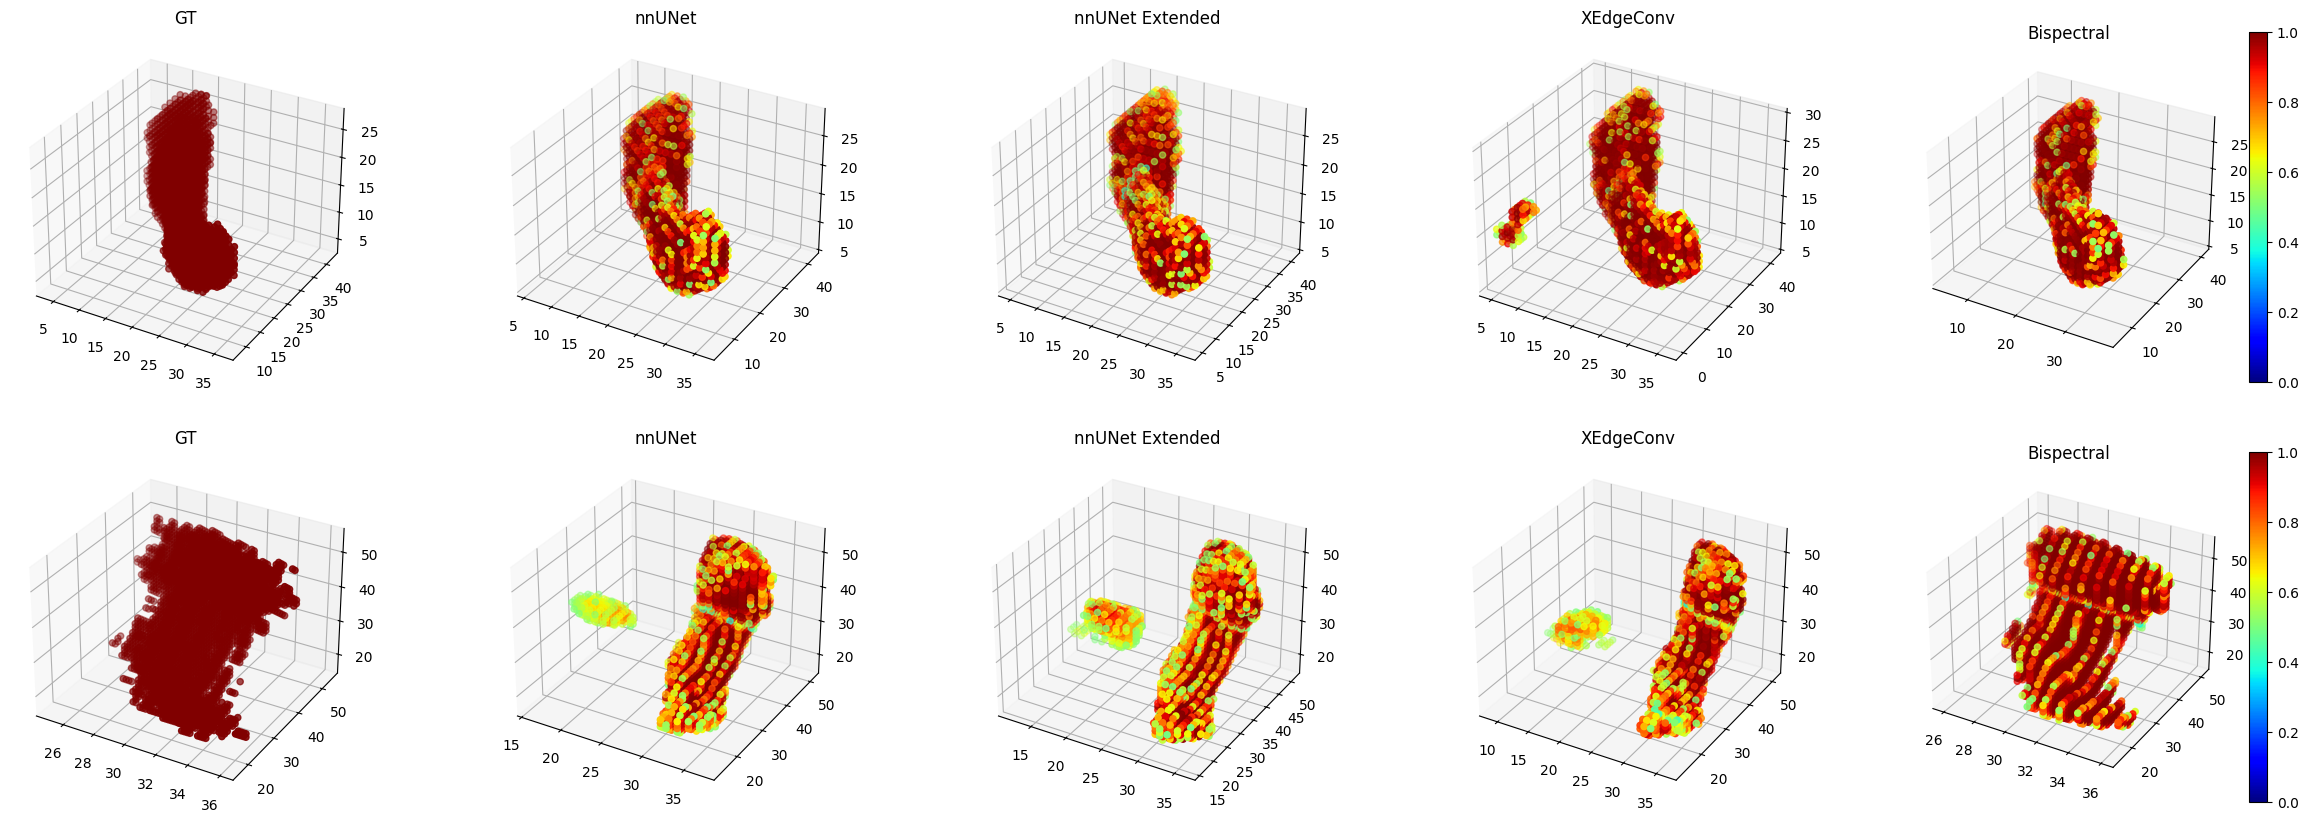

In [10]:

nbr_rot = len(gts)
model_used = ['GT', 'nnUNet', 'nnUNet Extended', 'XEdgeConv','Bispectral']

nbr_model = len(model_used)
fig = plt.figure(figsize=(6*nbr_model,5*nbr_rot))
cntr = 0
for current_rot in range(nbr_rot):
    
    cntr += 1
    ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
    ax.set_title('GT')
    gt_nn_base_x, gt_nn_base_y, gt_nn_base_z = np.nonzero(gts[current_rot])
    cs = gts[current_rot][gt_nn_base_x, gt_nn_base_y, gt_nn_base_z]
    c=scalarMap.to_rgba(cs)
    ax.scatter(gt_nn_base_x, gt_nn_base_y, gt_nn_base_z, c=c)
    
    if 'nnUNet' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('nnUNet')
        nn_base_val = nn_base_m[current_rot] * (nn_bases[current_rot]>0).astype(int)
        gt_nn_base_x, gt_nn_base_y, gt_nn_base_z = np.nonzero(nn_base_val)
        cs = nn_base_val[gt_nn_base_x, gt_nn_base_y, gt_nn_base_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_base_x, gt_nn_base_y, gt_nn_base_z, c=c)
        #scalarMap.set_array(cs)

    if 'nnUNet Extended' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('nnUNet Extended')
        nns_val = nns_m[current_rot] * (nns[current_rot]>0).astype(int)
        gt_nn_base_x, gt_nn_base_y, gt_nn_base_z = np.nonzero(nns_val)
        cs = nns_val[gt_nn_base_x, gt_nn_base_y, gt_nn_base_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_base_x, gt_nn_base_y, gt_nn_base_z, c=c)
        #scalarMap.set_array(cs)
        
    if 'XEdgeConv' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('XEdgeConv')
        xes_val = xes_m[current_rot] * (xes[current_rot]>0).astype(int)
        gt_nn_base_x, gt_nn_base_y, gt_nn_base_z = np.nonzero(xes_val)
        cs = xes_val[gt_nn_base_x, gt_nn_base_y, gt_nn_base_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_base_x, gt_nn_base_y, gt_nn_base_z, c=c)
        
    if 'Bispectral' in model_used:
        cntr += 1
        ax = fig.add_subplot(nbr_rot, nbr_model,cntr, projection='3d')
        ax.set_title('Bispectral')
        bis_val = bis_m[current_rot] * (bis[current_rot]>0).astype(int)
        gt_nn_base_x, gt_nn_base_y, gt_nn_base_z = np.nonzero(bis_val)
        cs = bis_val[gt_nn_base_x, gt_nn_base_y, gt_nn_base_z]
        c=scalarMap.to_rgba(cs)
        ax.scatter(gt_nn_base_x, gt_nn_base_y, gt_nn_base_z, c=c)
    

        
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap, ax= ax)
    
